In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Uber Request Data.csv")
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [4]:
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"])
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"])

In [5]:
df.columns = [col.replace(' ', '_') for col in df.columns]
df=df.drop(['Request_id','Driver_id','Drop_timestamp'], axis=1)
df.head()

,Pickup_point,Status,Request_timestamp
0,Airport,Trip Completed,2016-11-07 11:51:00
1,Airport,Trip Completed,2016-11-07 17:57:00
2,City,Trip Completed,2016-12-07 09:17:00
3,Airport,Trip Completed,2016-12-07 21:08:00
4,City,Trip Completed,2016-07-13 08:33:16


In [19]:
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [ ]:
##Session Details
#Late Night: Midnight to 4AM
#Early Morning: 4AM-8AM
#Late Morning: 8AM-Noon
#Afternoon: Noon-4PM
#Evening: 4PM-8PM
#Night: 8PM-Midnight

In [25]:
Session_lebels = ['Late Night','Morining','Late Morning','Sfternoon','Evining','Night']
df = df.assign(session = pd.cut(df.Request_timestamp.dt.hour,[-1,4,8,12,16,20,24],labels=Session_lebels))
df.head()

,Pickup_point,Status,Request_timestamp,session
0,Airport,Trip Completed,2016-11-07 11:51:00,Late Morning
1,Airport,Trip Completed,2016-11-07 17:57:00,Evining
2,City,Trip Completed,2016-12-07 09:17:00,Late Morning
3,Airport,Trip Completed,2016-12-07 21:08:00,Night
4,City,Trip Completed,2016-07-13 08:33:16,Morining


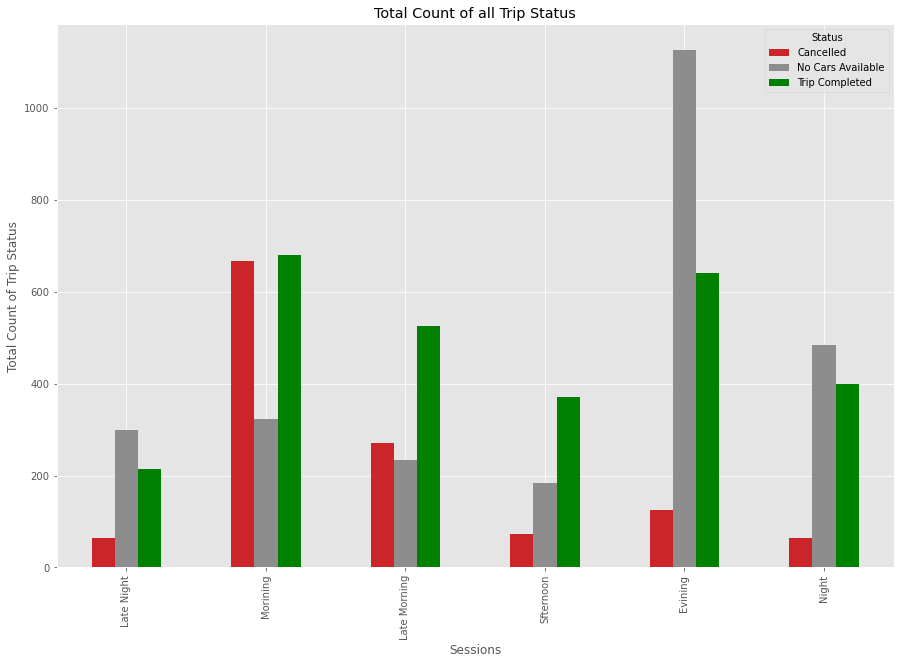

In [26]:
# plotting share/frequency of all "Trip Status" over the day to identify problem areas
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
df.groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Total Count all Trip')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trip')
plt.show()

In [ ]:
##Observation:
#1.
#In the Evening session, the number of “No cars available “ is maximum as compare to Night session 

#2.
#The maximum number of “cancelled” trip is In the early morning session as compared to late morning session.


In [37]:
# Filtering out only "Cancelled"  trips
df_tripscancelled=df[df["Status"].str.contains('Cancelled')==True]
df_tripscancelled=df_tripscancelled.reset_index(drop=True)
df_tripscancelled.head()

,Pickup_point,Status,Request_timestamp,session
0,City,Cancelled,2016-07-13 06:08:41,Early Morning
1,City,Cancelled,2016-07-14 17:07:58,Evening
2,Airport,Cancelled,2016-07-14 20:51:37,Evening
3,City,Cancelled,2016-07-15 10:12:40,Late Morning
4,Airport,Cancelled,2016-12-07 19:14:00,Evening


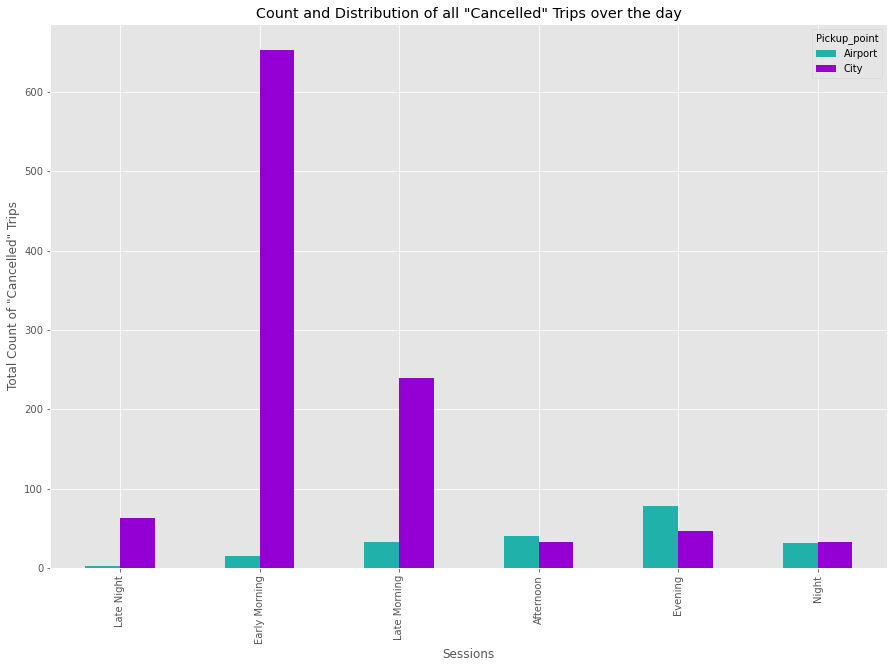

In [38]:
# plotting share/frequency of all Cancelled trips over the day to identify problem areas
plt.style.use('ggplot')
colors = ["#20B2AA", "#9400D3"]
df_tripscancelled.groupby(['session','Pickup_point']).Pickup_point.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "Cancelled" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "Cancelled" Trips')
plt.show()

In [ ]:
##Observation
#Where the pick up is “City” the maximum number of cancellation happens in the “early morning” time as compare to late night session. 
#And the most number of cancellations happen in the morning time in the city to airport route.


In [40]:
# Filtering out only "Cancelled"  trips
df_nocar=df[df["Status"].str.contains('No Car')==True]
df_nocar=df_nocar.reset_index(drop=True)
df_nocar.head()

,Pickup_point,Status,Request_timestamp,session
0,City,No Cars Available,2016-11-07 00:02:00,Late Night
1,City,No Cars Available,2016-11-07 00:06:00,Late Night
2,City,No Cars Available,2016-11-07 00:09:00,Late Night
3,Airport,No Cars Available,2016-11-07 00:23:00,Late Night
4,Airport,No Cars Available,2016-11-07 00:30:00,Late Night


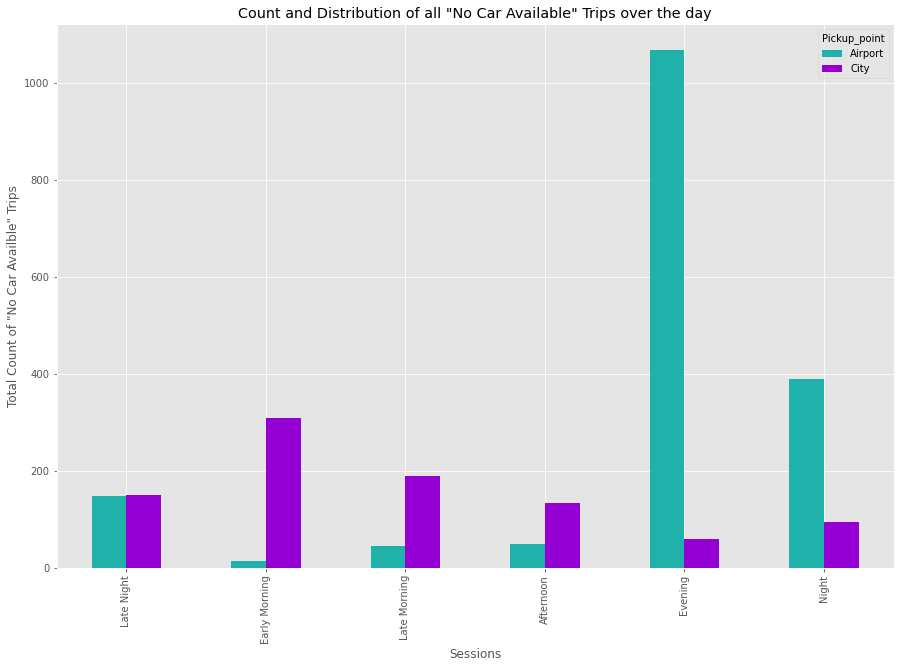

In [41]:
plt.style.use('ggplot')
colors = ["#20B2AA", "#9400D3"]
df_nocar.groupby(['session','Pickup_point']).Pickup_point.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "No Car Available" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "No Car Availble" Trips')
plt.show()

In [ ]:
###Observation
##1. As compare to the Night session the maximum no car available where the pic up is airport .
##2.Most number of No Cars Available happen in the Evening Hours in the Airport to City route


In [ ]:
## Let's drill down further by Pick-Up Point

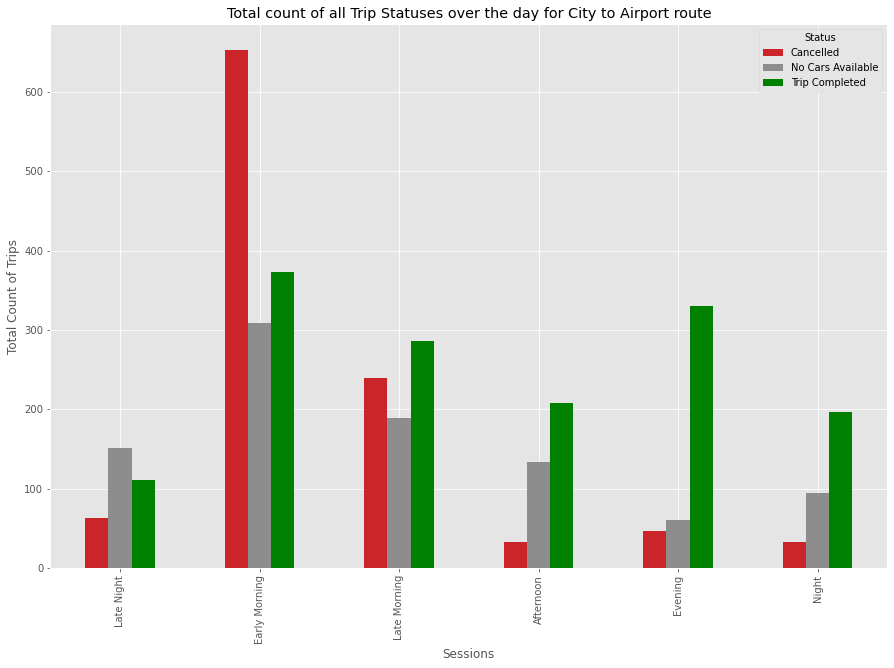

In [43]:
# Filtering out trips in the City to Airport route.WHERE THE PIC UP POINT IS City
df_citytoairport=df[df["Pickup_point"].str.contains('City')==True]
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
df_citytoairport.groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Total count of all Trip Statuses over the day for City to Airport route')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trips')
plt.show()

In [ ]:
##AS compare to late morning session the maximum number of cancilled trip from the city to airport happens in the early morning session


In [45]:
df["Supply_demand"] = ["supply" if x == "Trip Completed" else "Demand" for x in df["Status"]]
df.head(5)

,Pickup_point,Status,Request_timestamp,session,Supplt_demand,Supply_demand
0,Airport,Trip Completed,2016-11-07 11:51:00,Late Morning,supply,supply
1,Airport,Trip Completed,2016-11-07 17:57:00,Evening,supply,supply
2,City,Trip Completed,2016-12-07 09:17:00,Late Morning,supply,supply
3,Airport,Trip Completed,2016-12-07 21:08:00,Night,supply,supply
4,City,Trip Completed,2016-07-13 08:33:16,Early Morning,supply,supply


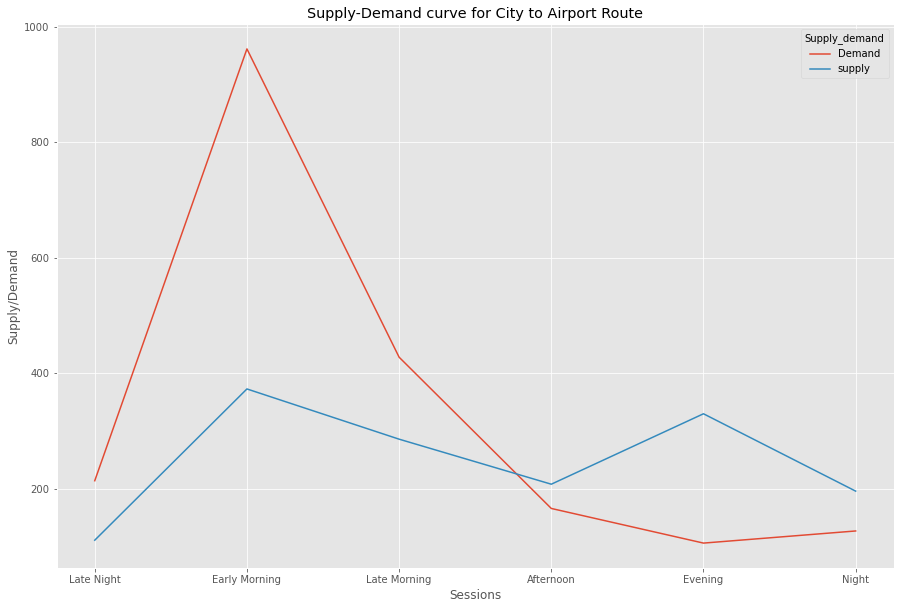

In [54]:
#Plotting Supply and Demand on the City to Airport Route
df_city_to_airport_supply_demand=df[df["Pickup_point"].str.contains('City')==True]
plt.style.use('ggplot')
df_city_to_airport_supply_demand.groupby(['session','Supply_demand']).Supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for City to Airport Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

In [ ]:
##Supply of cars is very law in the rout of city to airport in the morning time but the demand is really too high.


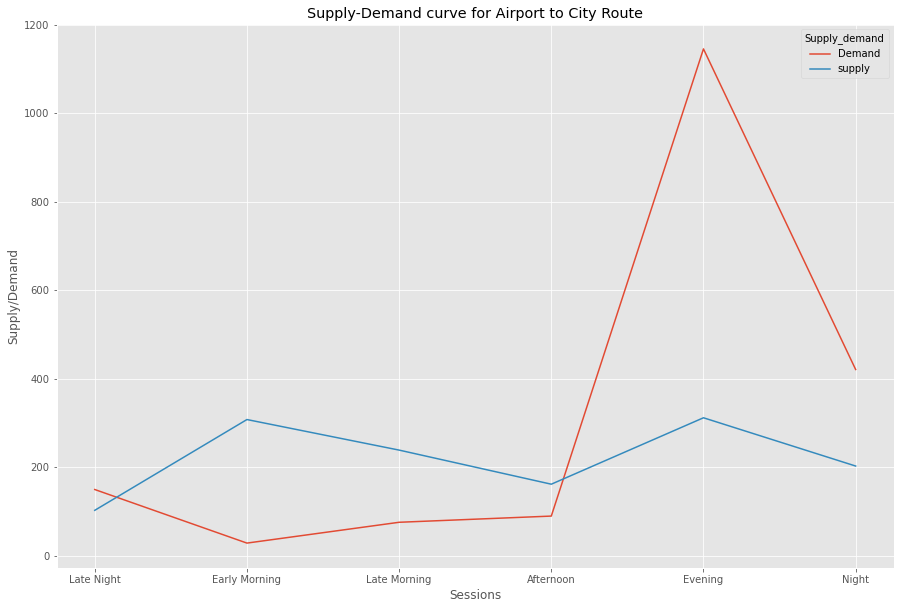

In [56]:
#Plotting Supply and Demand on the Airport to City route
df_airport_to_city_supply_demand=df[df["Pickup_point"].str.contains('Airport')==True]
plt.style.use('ggplot')
df_airport_to_city_supply_demand.groupby(['session','Supply_demand']).Supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for Airport to City Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

In [ ]:
##As same as the morning time or session in the evening time the demand of cars in the  airport to city rout is too high and the supply is too low


In [ ]:
#observation and as per my over view
##1. In the morning hours the number of cancellation of trips is high maybe because of in the morning and afternoon time on the airport to city and city to airport the demand of cars is law so at that time the car drivers who has done his trip city to airport rout at the morning time has to wait long or the may have to go back without any single passenger . And this is not suitable for them they can face loss so that’s why might be the cancellation count is too high.
##2. And in evening when there are too many flight coming in to the airport with the lots of passengers and at that time the demand goes high of  cabs and the face  not enough supply of cars . which is why most number of "No Cars Available" were observed in Evening in the Airport to City route.


In [ ]:
##suggestion 
#Give incentives or bonus for trips from City to Airport at Morning time.
#Give incentives or bonus for trips from Airport to City at Evening time.
#Uber can give Gas expense to drivers when they return from Airport without a ride or go to airport for pick up without a ride.
#Uber can separate the cars of the rout of city to airport so that the passengers can get cars easily and for the drivers they can decreases the % of amount what the have to pay to the compony. 
#Give incentives, bonus for trips from Airport to City during Evening hours.
#Uber can give Gas expense to drivers when they return from Airport without a ride or go to airport for pick up without a ride.
